In [1]:
import os
os.chdir("..")

In [2]:
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

In [3]:
# size = "393_2"
# size = "380_4"
size = "128_0"
df = pd.read_csv(f"{size}.csv")
df

,epoch,step,train_loss,val_loss,train_acc,val_acc,test_acc,past_task_test_acc
0,0,0,0.000000,2.301909,0.103125,0.100977,0.1045,0.1045
1,5,100,25.308239,0.610720,0.843750,0.812305,0.8320,0.8320
2,10,200,24.110811,0.463388,0.900781,0.853906,0.8707,0.8707
3,15,300,10.339012,0.388211,0.932031,0.886719,0.8937,0.8937
4,20,400,14.062381,0.329703,0.945312,0.905469,0.9130,0.9130
5,25,500,6.407071,0.350409,0.957812,0.898047,0.9087,0.9087
6,30,600,5.301343,0.303890,0.972656,0.915820,0.9218,0.9218
7,35,700,7.603304,0.309566,0.981250,0.916602,0.9228,0.9228
8,40,800,1.517895,0.339765,0.978125,0.917773,0.9206,0.9206
9,45,900,3.740237,0.322431,0.987500,0.924414,0.9296,0.9296


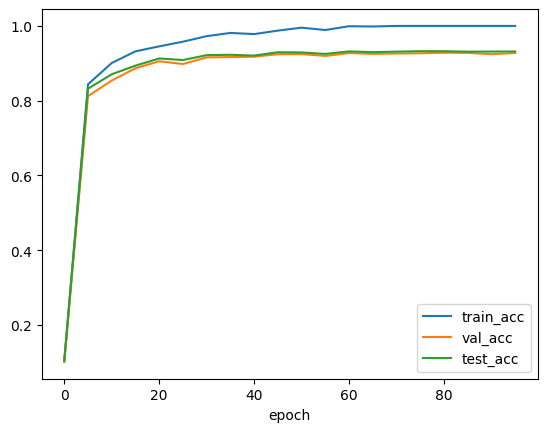

In [4]:
df.plot(x="epoch", y=["train_acc", "val_acc", "test_acc"]);

In [5]:
max(df["test_acc"])

0.9324

In [6]:
test_after = np.load(f"{size}_test_conf_after.npy")
test_before = np.load(f"{size}_test_conf_before.npy")
train_after = np.load(f"{size}_train_conf_after.npy")
train_before = np.load(f"{size}_train_conf_before.npy")

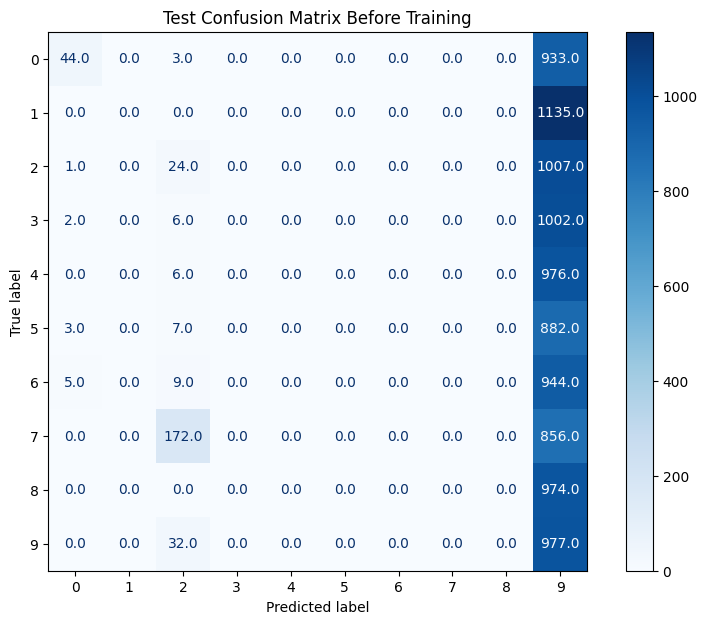

In [7]:
fig, ax = plt.subplots(figsize=(10, 7))
ConfusionMatrixDisplay(test_before).plot(cmap="Blues", values_format="", ax=ax);
plt.title("Test Confusion Matrix Before Training");

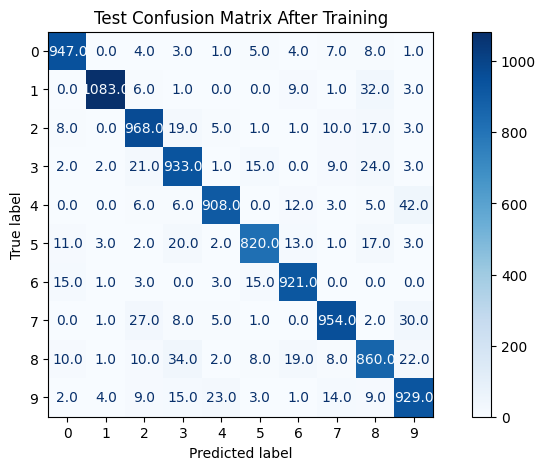

In [8]:
fig, ax = plt.subplots(figsize=(10, 5))
ConfusionMatrixDisplay(test_after).plot(cmap="Blues", values_format='', ax=ax);
plt.title("Test Confusion Matrix After Training");

In [9]:
# calculate the per-class accuracy from the confusion matrix
def per_class_acc(conf_mat):
    return np.diag(conf_mat) / conf_mat.sum(axis=1)

per_class_acc(test_after)

array([0.96632653, 0.95418502, 0.9379845 , 0.92376238, 0.92464358,
       0.91928251, 0.96137787, 0.92801556, 0.88295688, 0.92071358])

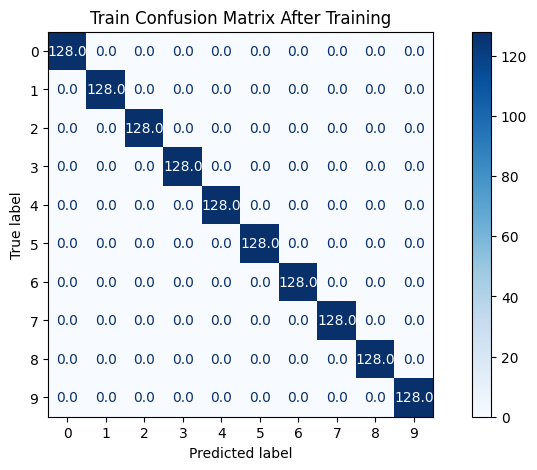

In [10]:
fig, ax = plt.subplots(figsize=(10, 5))
ConfusionMatrixDisplay(train_after).plot(cmap="Blues", values_format='', ax=ax);
plt.title("Train Confusion Matrix After Training");